In [1]:
import zipfile
import fnmatch
import matplotlib.pyplot as plt

# # specify the path to the zip file
# zip_path = "Data/Test/wetransfer_crime-files_2023-05-03_1002.zip"

# # pattern for files to extract
# pattern1 = "*metropolitan-street.csv"
# pattern2 = "*metropolitan-outcomes.csv"
# pattern3 = "*metropolitan-stop-and-search.csv"

# # open the zip file for reading
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    
#     # iterate through all files in the archive
#     for file_name in zip_ref.namelist():
#         # print(file_name)
#         # extract file if it matches the pattern
#         if fnmatch.fnmatch(file_name, pattern1) or fnmatch.fnmatch(file_name, pattern2) or fnmatch.fnmatch(file_name, pattern3):
#             # print(file_name)
#             zip_ref.extract(file_name, "Data/Test")

In [2]:
import os
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# # specify the directory containing the CSV files
# directory = "Data"

# # initialize an empty list to store dataframes
# df_list = []

# # iterate through all subfolders and CSV files in the directory
# for root, dirs, files in os.walk(directory):
#     for filename in files:
#         # print(filename)
#         #Change csv names
#         if filename.endswith("metropolitan-street.csv"): 
#             # print(filename)
#             # read the CSV file into a dataframe and append to the list
#             filepath = os.path.join(root, filename)
#             df = pd.read_csv(filepath)
#             df_list.append(df)

# # concatenate all dataframes into a single dataframe
# concatenated_df = pd.concat(df_list, axis=0, ignore_index=True)
# # write the concatenated dataframe to a new parquet file
# output_filepath = "Data/Test/Metropolitan-street.parquet"

# # write the concatenated dataframe to a Parquet file
# table = pa.Table.from_pandas(concatenated_df)
# pq.write_table(table, output_filepath)

In [3]:
dataset = pd.read_csv('Cleaned_dataset.csv')

In [4]:
# import pandas as pd  
 
# parquet_file = r"Data/Test/Metropolitan-street.parquet"
# dataset = pd.read_parquet(parquet_file, engine='pyarrow')
# pd.options.display.max_columns = None
# dataset = dataset[dataset['LSOA name'].str.contains('Barnet')==True]
# dataset = dataset[dataset['Crime type'].str.contains('Burglary')==True]
# dataset = dataset.sort_values('Month')

In [5]:
dataset.columns

Index(['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'LSOA code',
       'LSOA name', 'Last outcome category'],
      dtype='object')

In [11]:
dataset['Month']

0        2010-12
1        2010-12
2        2010-12
3        2010-12
4        2010-12
          ...   
42859    2022-09
42860    2022-09
42861    2022-09
42862    2022-09
42863    2022-09
Name: Month, Length: 42864, dtype: object

In [12]:
def create_dct(var):
    counting_dct = {}
    for x in dataset[var]:
        if x not in counting_dct:
            counting_dct[x] = 1
        else:
            counting_dct[x] +=1
        
    return counting_dct

In [16]:
crime_id_dct = create_dct('Crime ID')
month_dct = create_dct('Month')
# reported_by_dct = create_dct('Reported by')
# falls_within_dct = create_dct('Falls within')
longitude_dct = create_dct('Longitude')
latitude_dct = create_dct('Latitude')
location_dct = create_dct('Location')
lsao_code_dct = create_dct('LSOA code')
lsao_name_dct = create_dct('LSOA name')
# crime_type_dct = create_dct('Crime type')
last_outcome_category_dct = create_dct('Last outcome category')
# context_dct = create_dct('Context')

In [23]:
dataset

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Last outcome category
0,NaN,2010-12,-0.227314,51.578618,On or near Fairfield Avenue,E01000310,Barnet 034C,NaN
1,NaN,2010-12,-0.165580,51.590574,On or near Beresford Road,E01000181,Barnet 029D,NaN
2,NaN,2010-12,-0.169042,51.588137,On or near Deansway,E01000180,Barnet 029C,NaN
3,NaN,2010-12,-0.167290,51.590789,On or near Market Place,E01000180,Barnet 029C,NaN
4,NaN,2010-12,-0.169344,51.589257,On or near Prospect Place,E01000180,Barnet 029C,NaN
...,...,...,...,...,...,...,...,...
42859,a067b2af21f97e091a3fbd1b02bc5edd9c137eaf39a74f...,2022-09,-0.278600,51.613930,On or near Manor Park Gardens,E01000193,Barnet 018B,Under investigation
42860,743b28b713bcc0eb1ea43f39c21975916fd63b466c1c78...,2022-09,-0.278298,51.610473,On or near Forumside,E01000194,Barnet 018C,Investigation complete; no suspect identified
42861,760ab0dfb70ed47cef1eac2bea7d10ec42b93f0d5813ae...,2022-09,-0.277809,51.612713,On or near Gideon Close,E01000194,Barnet 018C,Under investigation
42862,ac13f1c61e6a14fe840ff96b0515746a25112cff2b79b0...,2022-09,-0.207971,51.609879,On or near School House Lane,E01000257,Barnet 017B,Under investigation


In [20]:
len(lsao_code_dct)

211

In [30]:
x

[[-0.227314, 51.578618],
 [-0.16558, 51.590574],
 [-0.169042, 51.588137],
 [-0.16729, 51.590789],
 [-0.169344, 51.589257],
 [-0.175273, 51.595113],
 [-0.170886, 51.593624],
 [-0.168295, 51.59272],
 [-0.190137, 51.595658],
 [-0.192325, 51.591447],
 [-0.200935, 51.595338],
 [-0.192957, 51.593723],
 [-0.194531, 51.596274],
 [-0.206661, 51.589617],
 [-0.202051, 51.598512],
 [-0.204437, 51.597334],
 [-0.196852, 51.599277],
 [-0.201129, 51.596258],
 [-0.162926, 51.591953],
 [-0.181269, 51.604756],
 [-0.163405, 51.592608],
 [-0.161928, 51.58986],
 [-0.223739, 51.597394],
 [-0.226529, 51.596555],
 [-0.229605, 51.599884],
 [-0.235189, 51.597738],
 [-0.233465, 51.590824],
 [-0.248276, 51.593096],
 [-0.24712, 51.59164],
 [-0.25172, 51.587626],
 [-0.247202, 51.59701],
 [-0.250185, 51.598268],
 [-0.162369, 51.586792],
 [-0.162995, 51.588825],
 [-0.182874, 51.604349],
 [-0.180313, 51.603024],
 [-0.178291, 51.604125],
 [-0.268204, 51.607006],
 [-0.263412, 51.608841],
 [-0.261486, 51.597627],
 [-0.186

In [17]:
test = {}
for x in crime_id_dct:
    if crime_id_dct[x] not in test:
        test[crime_id_dct[x]] = 1
    else:
        test[crime_id_dct[x]] += 1
test

{4000: 1, 1: 36100, 2: 1382}

In [18]:
# dataset.drop_duplicates(inplace=True)
# dataset.drop(['Reported by', 'Falls within', 'Crime type', 'Context'], axis=1, inplace=True)

In [26]:
doubles_crime = []
for x in crime_id_dct:
    if crime_id_dct[x] == 2:
        doubles_crime.append(x)

In [27]:
crimes_2 = dataset[dataset['Crime ID'].isin(doubles_crime)]

<ipython-input-28-1b56bc83c4b8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_dct.keys(), rotation = 45, rotation_mode='anchor', ha='right');


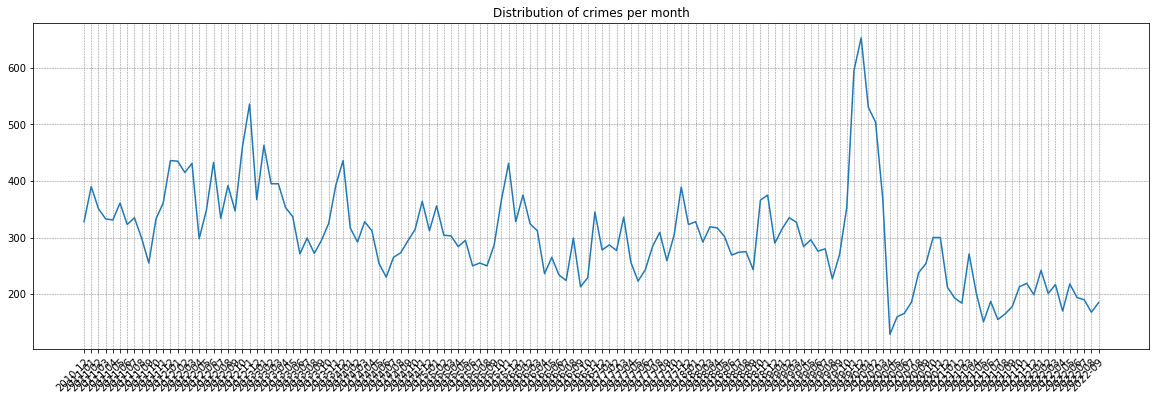

In [28]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (20, 6))
ax.plot(month_dct.keys(), month_dct.values())
ax.set_xticklabels(month_dct.keys(), rotation = 45, rotation_mode='anchor', ha='right');
ax.grid(which='major', linestyle='--', linewidth=0.5, color='grey');
ax.set_title('Distribution of crimes per month');
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 0.1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# ax.set_xticks(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']);

<ipython-input-29-eff14252afaf>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Data not available', 'No suspect identified', 'Offender warned/charged', 'Awaiting outcome', 'Investigation ongoing', 'Not Guilty'], rotation = 40, rotation_mode='anchor', ha='right');


{nan: 5350,
 'Court case unable to proceed': 37,
 'Offender sent to prison': 331,
 'Investigation complete; no suspect identified': 16016,
 'Suspect charged as part of another case': 221,
 'Court result unavailable': 516,
 'Defendant found not guilty': 137,
 'Offender given a caution': 29,
 'Offender given community sentence': 79,
 'Offender given suspended prison sentence': 80,
 'Under investigation': 12103,
 'Offender given conditional discharge': 6,
 'Offender fined': 12,
 'Offender given a drugs possession warning': 1,
 'Local resolution': 11,
 'Offender ordered to pay compensation': 2,
 'Awaiting court outcome': 205,
 'Offender given absolute discharge': 1,
 'Defendant sent to Crown Court': 1,
 'Offender otherwise dealt with': 1,
 'Status update unavailable': 7725}

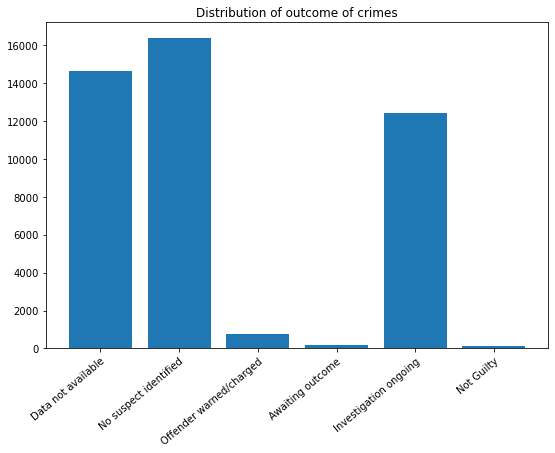

In [29]:
fig, ax = plt.subplots(figsize = (9,6))
ax.bar(['Data not available', 'No suspect identified', 'Offender warned/charged', 'Awaiting outcome', 'Investigation ongoing', 'Not Guilty'], [7948+516+6157, 16330+37, 30+331+221+79+80+6+1+12+11+2+1+1+1, 205, 12391, 137])
ax.set_xticklabels(['Data not available', 'No suspect identified', 'Offender warned/charged', 'Awaiting outcome', 'Investigation ongoing', 'Not Guilty'], rotation = 40, rotation_mode='anchor', ha='right');
ax.set_title('Distribution of outcome of crimes');
last_outcome_category_dct


In [120]:
30+331+221+79+80+6+1+12+11+2+1+1+1

776